In [0]:
import pandas as pd 
import numpy as np

In [0]:
df = pd.read_csv("heart.csv")
#from further analysis we noticed that there was a duplicated line in the dataset,
#so we remove the duplicates.
df = df.drop_duplicates()
df = df.drop("target",1)
#df = df.drop("exang",1)
#we notice that, deleting the target variables the thing changes. 

In [0]:
#print the first 10 instances of the dataset
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [0]:
#Here we normalize the data.

from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)

In [0]:
#print the first 10 instances of the normalized dataset
normalized_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667
5,0.583333,1.0,0.000000,0.433962,0.150685,0.0,0.5,0.587786,0.0,0.064516,0.5,0.0,0.333333
6,0.562500,0.0,0.333333,0.433962,0.383562,0.0,0.0,0.625954,0.0,0.209677,0.5,0.0,0.666667
7,0.312500,1.0,0.333333,0.245283,0.312785,0.0,0.5,0.778626,0.0,0.000000,1.0,0.0,1.000000
8,0.479167,1.0,0.666667,0.735849,0.166667,1.0,0.5,0.694656,0.0,0.080645,1.0,0.0,1.000000
9,0.583333,1.0,0.666667,0.528302,0.095890,0.0,0.5,0.786260,0.0,0.258065,1.0,0.0,0.666667


In [0]:
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances

#compute the matrix of the cosine distances
cosine_matrix = cosine_similarity(normalized_df) 
#drop the main diagonal's values which bias the similarity
cosine_matrix = cosine_matrix- np.eye(cosine_matrix.shape[0])

In [0]:
#let's find the element with the max value in the cosine distance matrix, i.e. better similarity
np.where(cosine_matrix==cosine_matrix.max())

(array([107, 119]), array([119, 107]))

In [0]:
#print the max value
cosine_matrix[107,119]

0.9996545696411985

In [0]:
#compute the matrix of the euclidean distances
euclidean_matrix = euclidean_distances(normalized_df)
#drop the main diagonal's values which bias the similarity
euclidean_matrix = euclidean_matrix+ np.eye(euclidean_matrix.shape[0])

In [0]:
#let's find the element with the min value in the euclidean distance matrix, i.e. better similarity
np.where(euclidean_matrix==euclidean_matrix.min())

(array([107, 119]), array([119, 107]))

In [0]:
#print the min value
euclidean_matrix[107,119]

0.041593585597105125

In [0]:
#surprisingly the two elements match

In [0]:
#Here we visualize the attribute from the two most similar elements in the dataset according to the two distances
df.loc[[107]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2


In [0]:
df.loc[[119]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2


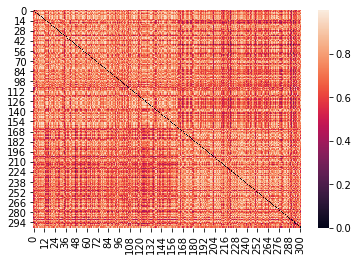

In [0]:
import seaborn as sbs 
sbs.heatmap(cosine_matrix)

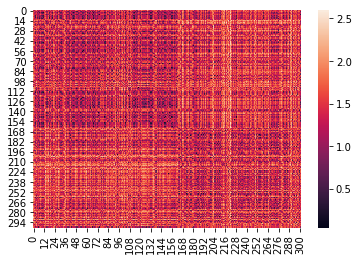

In [0]:
sbs.heatmap(euclidean_matrix)